# Purpose:
The purpose of this notebook is to create a PyTorch ANN Classification Class.

* Toy data will be created
* A classification model will be constructed with fitting and plotting functions
* Testing the various class functions

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

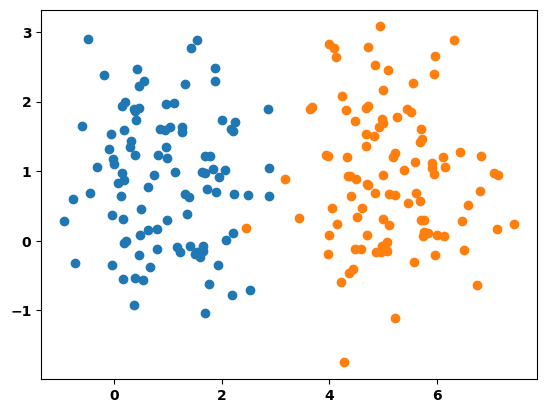

In [2]:
# generating toy data

n_cluster = 100
blur = 1

A = [1,1]
B = [5,1] # this will offset the data by 5 on the x-axis

# x and y data per class a and b aka 0 and 1
a = [A[0]+np.random.randn(n_cluster)*blur, A[1]+np.random.randn(n_cluster)*blur]
b = [B[0]+np.random.randn(n_cluster)*blur, B[1]+np.random.randn(n_cluster)*blur]

# labeling the first hundred as 0s and the next hundred as 1s
labels_np = np.vstack((np.zeros((n_cluster,1)), np.ones((n_cluster,1))))


data_np = np.hstack((a,b)).T


data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

plt.scatter(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1])
plt.scatter(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1])

In [3]:
# constructing an ANN Classification model

class ANN_Classifier(nn.Module):
    '''
    DESCRIPTION: The ANN_Classifier() will build a binary classification model.
    INPUTS:
        lr: Learning Rate. Default = 0.01
        epochs: Number of full training loops
    RETURNS: A model object.
    NOTE:  User must fit model prior to using other methods.
    METHODS:
        .fit()
        .predict()
        .score()
        .plot_losses()
    '''
    def __init__(self,lr=0.01,epochs=500):
        super().__init__()
        self.lr = lr # learning rate
        self.epochs = epochs # number of training full iterations
        
    def fit(self,X,y):
        '''
        DESCRIPTION: .fit() will train the model.
        INPUT:
            X: training features
            y: training labels
        RETURNS: Nothing.
        '''
        self.X = X
        self.y = y
        
        self.ANN_clf = nn.Sequential( # ANN
            nn.Linear(self.X.size()[1],1),
            nn.ReLU(),
            nn.Linear(1,1)
            )
        loss_fn = nn.BCEWithLogitsLoss() # loss function
        opti = torch.optim.SGD(self.ANN_clf.parameters(), self.lr) # optimizer
        
        self.losses = torch.zeros(self.epochs) # blank list for storing the losses
        self.ANN_clf.train() # set training mode
        
        for epoch in range(self.epochs): # training loop
            pred = self.ANN_clf(self.X) # forward pass
            loss = loss_fn(pred,self.y) # computing the loss
            self.losses[epoch] = loss # saving the loss per epoch
            
            opti.zero_grad() # backwards pass
            loss.backward() # backwards pass
            opti.step() # backwards pass
    
    def predict(self,X):
        '''
        DESCRIPTION: Predict method takes X feature(s) and predicts their class label.
        INPUT:
            X: X features
        RETURNS: y prediction labels.
        '''
        self.ANN_clf.eval() # set eval mode
        with torch.no_grad(): # no need to compute grads
            y_preds = (self.ANN_clf(X) > 0).float() # prediction label
        return y_preds
    
    def score(self,X,y):
        '''
        DESCRIPTION: Provides accuracy score.
        INPUTS:
            X: X features.
            y: True class labels.
        RETURNS: Accuracy Score
        '''
        self.ANN_clf.eval() # set eval mode
        with torch.no_grad(): # no need to compute grads
            y_preds = (self.ANN_clf(X) > 0).float() # prediction label
            self.score = (y.size()[0] - abs(y.sum() - y_preds.sum())) / y.size()[0] # accuracy score
        return self.score
    
    def plot_losses(self, label='Losses'): # plotting the losses per epoch
        '''
        DESCRIPTION: Plots the losses over each epoch.
        INPUTS: 
            label: Allows for custom plot legend label.  Default is 'Losses.''
        RETURNS: Losses Plot.
        '''
        plt.plot(range(self.epochs), self.losses.detach().numpy(), label=label)
        plt.title('Losses per Epoch')
        plt.grid()
        plt.legend();

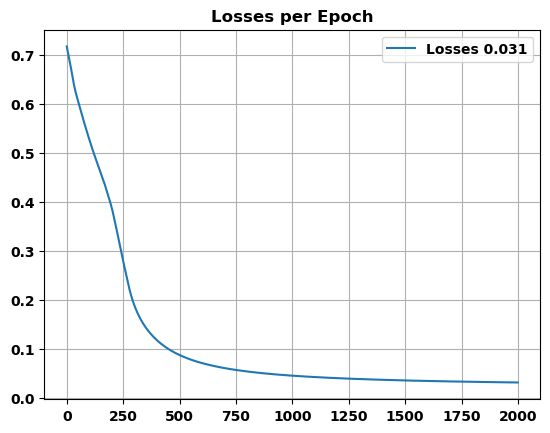

In [4]:
# testing the ANN class

clf = ANN_Classifier(lr=0.1, epochs=2000)

clf.fit(X=data, y=labels)

clf.plot_losses(label=f'Losses {clf.losses[-1]:.3f}')

In [5]:
clf.score(X=data, y=labels)

tensor(0.9950)

In [6]:
y_preds = clf.predict(X=data)

np.column_stack((y_preds.numpy(), labels.numpy()))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.